In [1]:
import os
!nvidia-smi

useColab = True

if useColab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    
    recordpath='gdrive/My Drive/Colab Notebooks/00data/record/'
    exppath='gdrive/My Drive/Colab Notebooks/00data/record/experiments/'
    storagepath='gdrive/My Drive/Colab Notebooks/00data/storage/'
else:
    recordpath='/home/hdaniel/Downloads/record/'
    exppath='/home/hdaniel/Downloads/record/experiments/'
    storagepath='/home/hdaniel/Downloads/'

Sat Jun 20 11:14:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
if useColab:
  %run gdrive/My\ Drive/Colab\ Notebooks/lib/common.ipynb
else:
  %run lib/common.ipynb

common 1.5.1


In [3]:
#Append logs
'''
logFNL1 = exppath + 'experiment.log'
logFNL2 = exppath + 'experiment-channels-100p.log'
log1 = SimpleLog.load(logFNL1)
log2 = SimpleLog.load(logFNL2)

log1.append(log2)
#log1.save(logFNL2)
showLog(log1, time=False)
'''
#log1.save(logFNL2)
#showLog(log1, time=False)

"\nlogFNL1 = exppath + 'experiment.log'\nlogFNL2 = exppath + 'experiment-channels-100p.log'\nlog1 = SimpleLog.load(logFNL1)\nlog2 = SimpleLog.load(logFNL2)\n\nlog1.append(log2)\n#log1.save(logFNL2)\nshowLog(log1, time=False)\n"

Log entries =  420
Log: 
(2000, 0, 78, 1.0, 8.70794299117563e-06, 401.74849677085876, svmem(total=13655322624, available=11626434560, percent=14.9, used=2708836352, free=7593197568, active=1834209280, inactive=3824553984, buffers=86044672, cached=3267244032, shared=12468224, slab=188747776))
(2000, 1, 73, 0.9992857, 0.00022095914330071294, 375.84378457069397, svmem(total=13655322624, available=11601260544, percent=15.0, used=2735136768, free=7531356160, active=1863733248, inactive=3858997248, buffers=87408640, cached=3301421056, shared=12468224, slab=190144512))
(2000, 2, 48, 1.0, 1.7674231751747462e-05, 248.65508151054382, svmem(total=13655322624, available=11568758784, percent=15.3, used=2767478784, free=7463899136, active=1888522240, inactive=3892244480, buffers=88391680, cached=3335553024, shared=12468224, slab=190902272))
(2000, 3, 36, 1.0, 9.301441649745529e-05, 189.25647974014282, svmem(total=13655322624, available=11552165888, percent=15.4, used=2784505856, free=7429062656, act

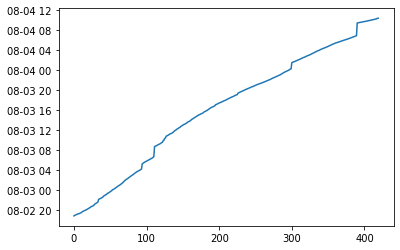

In [7]:
#Show Log
#
def showLogTimes(log):
    print('Log entries = ', log.len())
    print('Log: ')
    for i in log.getTime(): print(i)
    #plt.plot(log.getTime(), range(0, log.len()))
    plt.plot(log.getTime())

def showLog(log, time=True):
    print('Log entries = ', log.len())
    print('Log: ')
    for i in log.getAll():
        if time: print(i[0], end='')
        print(i[1])

    print('\nLog last entry:')
    print(str(log.getLast()[0]))
    print(log.getLast()[1])


#logFNL = exppath + 'experiment.log'
logFNL = exppath + 'experiment_AP30-1.0.log'
log = SimpleLog.load(logFNL)

#showLogTimes(log)
showLog(log, time=False)
plt.plot(log.getTime())

Exp   runs 100%    best     val_acc (stdev)    epochs (stdev)    time
  12   30    0    94.9286   93.7333 (0.6779)   200.00 ( 0.00)   297.48
  02   30    0    95.0000   93.2452 (0.7379)   200.00 ( 0.00)   335.45
  01   30    0    91.5714   90.1214 (0.9518)   200.00 ( 0.00)   360.20
   0   30    0    92.7857   90.6619 (0.8997)   200.00 ( 0.00)   467.01
   1   30    0    91.0714   89.1095 (1.0138)   200.00 ( 0.00)   199.19
   2   30    0    96.2857   94.7357 (0.8113)   200.00 ( 0.00)   235.56


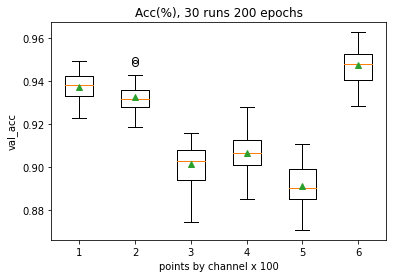

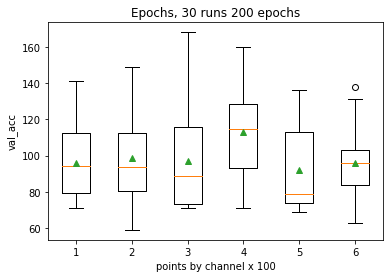

In [8]:
logFNL = exppath + 'experiment-channels-100p.log'
#logFNL = exppath + 'experiment_AP30-1.0.log'
logseries = getLogSeries(logFNL, True) 

#showMeans(logseries, maxAcc=1.0, time=True)
showMeans(logseries, maxAcc=1.0, mode=('max', 200, 30), time=True)
#showMeans(logseries, maxAcc=1.0, mode=('first', 200, 30), time=True)

#Boxplots 
logseries = getLogSeries(logFNL, False)
plotBoxes2(logseries, title='Acc(%), 30 runs 200 epochs', width=0.5)
plotBoxes2(logseries, measure='epoch', title='Epochs, 30 runs 200 epochs', width=0.5)
#import itertools
#lseries = dict(itertools.islice(logseries.items(), 4))
#plotBoxes2(lseries, title='Acc(%) 30 runs 200 epochs', width=1, positions=[8, 6, 4, 2])
#lseries = dict(itertools.islice(logseries.items(), 4, 7))
#plotBoxes2(lseries, title='Acc(%) 30 runs 200 epochs', width=0.3, positions=[1, 0.5, 0.25])

23
146
55.733333333333334
23.36797428580882


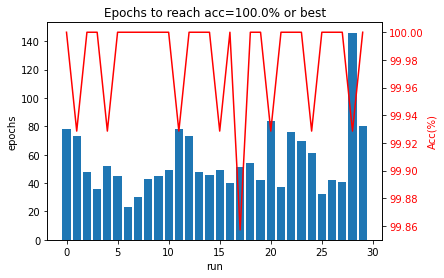

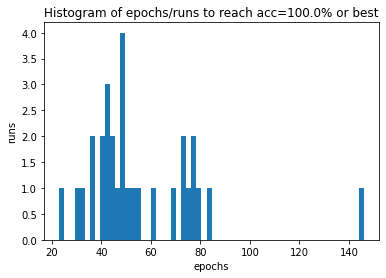

In [10]:
#logFNL = exppath + 'experiment.log'
logFNL = exppath + 'experiment_AP30-1.0.log'
logseries = getLogSeries(logFNL, True) 

e=2000
runs = len(logseries[e]['epoch'])
trainEpochs = logseries[e]['epoch']
trainAccs   = logseries[e]['acc']
trainLosses = logseries[e]['loss']

plotStats(runs, trainEpochs, trainAccs, trainLosses, earlyStopACCmin=1.0)    

In [11]:
todo: compare 2000 pts and 800 pts datasets if equal
todo: remake samples with seed 1024 and diff 6512 seeds, for 2000 pts
todo: move fix epoch max out of means? Make new class for CTBU log? ModelLog?

SyntaxError: ignored

In [12]:
logFNL = exppath + 'experiment2000fixed.log'
logseries = getLogSeries(logFNL, True) 
showMeans(logseries, maxAcc=1.0, time=True)

for e in logseries: 
    print(e,':')
    print(logseries[e]['epoch']) 
    print(logseries[e]['acc']) 

Exp   runs 100%    best     val_acc (stdev)    epochs (stdev)    time
2000   31   17   100.0000   99.9677 (0.0355)    73.94 (28.40)   469.30
2000 :
[93, 79, 35, 43, 17, 100, 100, 77, 100, 100, 62, 100, 27, 100, 56, 100, 100, 51, 63, 63, 100, 100, 100, 37, 100, 27, 65, 100, 71, 100, 26]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.9992857, 0.9992857, 1.0, 0.9992857, 0.9992857, 1.0, 0.9992857, 1.0, 0.9992857, 1.0, 0.9992857, 0.9992857, 1.0, 1.0, 1.0, 0.9992857, 0.9992857, 0.9992857, 1.0, 0.9992857, 1.0, 1.0, 0.9992857, 1.0, 0.9992857, 1.0]


In [13]:
logFNL = exppath + 'experiment2000bouncing.log'
logseries = getLogSeries(logFNL, True) 
showMeans(logseries, maxAcc=1.0, time=True)

for e in logseries: 
    print(e,':')
    print(logseries[e]['epoch']) 
    print(logseries[e]['acc']) 

Exp   runs 100%    best     val_acc (stdev)    epochs (stdev)    time
2000   34   26   100.0000   99.9832 (0.0303)    59.24 (27.59)   296.65
2000 :
[18, 27, 22, 100, 100, 26, 48, 62, 60, 74, 100, 40, 55, 87, 100, 69, 100, 50, 51, 47, 100, 19, 73, 27, 53, 36, 27, 39, 100, 41, 60, 59, 44, 100]
[1.0, 1.0, 1.0, 0.9992857, 0.9992857, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9992857, 1.0, 1.0, 1.0, 0.9992857, 1.0, 0.9992857, 1.0, 1.0, 1.0, 0.9992857, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9992857, 1.0, 1.0, 1.0, 1.0, 0.9992857]


In [14]:
#Compare experiences
logFNL1 = exppath + 'experiment_AP25.log'
logseries1 = getLogSeries(logFNL1, False) 
#logFNL2 = exppath + 'experiment_BP25.log'
logFNL2 = exppath + 'experiment_AP100.log'
logseries2 = getLogSeries(logFNL2, False) 

print('Pts   runs  epochs(mean/stdev)   runs  epochs(mean/stdev)')
for e1, e2 in zip(logseries1, logseries2):
    mean1  = np.mean(logseries1[e1]['epoch'])
    stdev1 = np.std(logseries1[e1]['epoch'])
    mean2  = np.mean(logseries2[e2]['epoch'])
    stdev2 = np.std(logseries2[e2]['epoch'])

    print('{:4d} {:4d} {:8.2f}  {:8.4f}    {:4d} {:8.2f}  {:8.4f}'.format(
        e1, len(logseries1[e1]['epoch']), mean1, stdev1, len(logseries2[e2]['epoch']), mean2, stdev2))

Pts   runs  epochs(mean/stdev)   runs  epochs(mean/stdev)
2000   25     3.68    0.5455     100     3.82    0.6983
1800   25     4.12    0.6524     100     4.31    0.7442
1600   25     4.44    0.4964     100     4.59    0.7758
1400   25     4.92    0.7960     100     4.94    0.8581
1200   25     5.20    0.8944     100     5.41    0.9705
1000   25     6.28    1.2496     100     6.49    1.1874
 800   25     7.80    1.7889     100     7.22    1.3681
 600   25     8.56    1.3588     100     8.10    1.5843
 400   25     8.92    1.7645     100     9.42    2.1409
 200   25    97.00   52.6293     100    96.63   68.8450


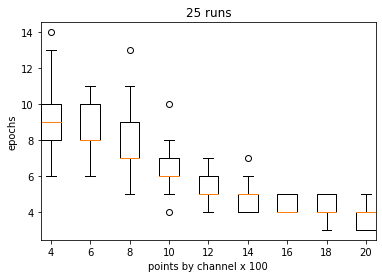

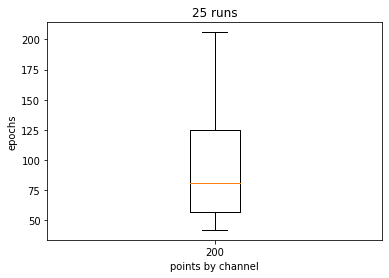

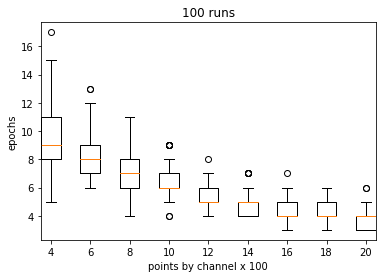

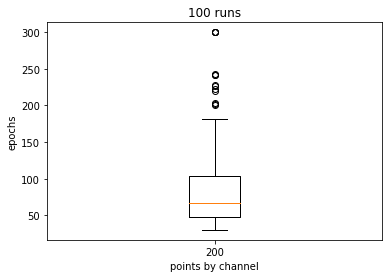

In [15]:
#Boxplots 
logFNL = exppath + 'experiment_AP25.log'
logseries = getLogSeries(logFNL, False)
plotBoxes1(logseries, title='25 runs')    

logFNL = exppath + 'experiment_AP100.log'
logseries = getLogSeries(logFNL, True)
plotBoxes1(logseries, title='100 runs')    

Exp   runs 100%    best     val_acc (stdev)    epochs (stdev)    time
2000   30   22   100.0000   99.9786 (0.0376)    55.73 (23.37)
1800   30    8   100.0000   99.9286 (0.0553)    74.10 (21.11)
1600   30    0    99.9286   99.8452 (0.0667)    87.87 (23.41)
1400   30    0    99.9286   99.7000 (0.1229)    77.40 (20.30)
1200   30    0    99.9286   99.6357 (0.1309)    89.07 (23.79)
1000   30    0    99.8571   99.5643 (0.1479)    87.47 (27.01)
 800   30    0    99.7143   99.3619 (0.2174)    82.07 (19.76)
 600   30    0    99.7143   99.3310 (0.2107)    95.20 (21.55)
 400   30    0    99.3571   99.0476 (0.1963)    85.67 (25.49)
 200   30    0    98.3571   97.5691 (0.3616)    95.87 (21.83)
 150   30    0    98.0000   96.7524 (0.5439)    99.60 (23.15)
 100   30    0    94.8571   93.5976 (0.7385)    97.27 (25.33)
  50   30    0    77.7143   74.9333 (1.1291)    62.30 ( 9.40)
  25   30    0    52.0000   49.5429 (0.9367)    54.57 ( 3.62)


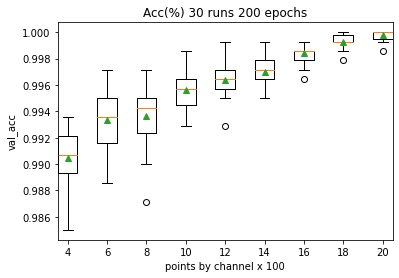

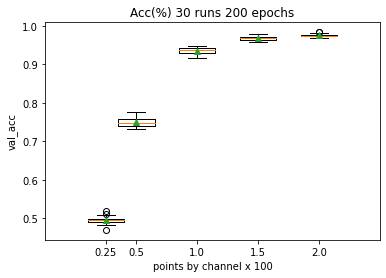

In [16]:
#Boxplots 
logFNL = exppath + 'experiment_AP30-1.0.log'
logseries = getLogSeries(logFNL, False)
showMeans(logseries, maxAcc=1.0, time=False)

import itertools

lseries = dict(itertools.islice(logseries.items(), 9))
plotBoxes2(lseries, title='Acc(%) 30 runs 200 epochs', width=1, positions=[20, 18, 16, 14, 12, 10, 8, 6, 4])
lseries = dict(itertools.islice(logseries.items(), 9, 14))
plotBoxes2(lseries, title='Acc(%) 30 runs 200 epochs', width=0.3, positions=[2, 1.5, 1, 0.5, 0.25])

In [17]:
def plotCompareAcc(logFNL1, logFNL2, description): 
    logseries1 = getLogSeries(logFNL1, False) 
    logseries2 = getLogSeries(logFNL2, False) 

    exps, runs, means1, mins, maxs, stdevs, nbests1 = lstats(logseries1, measure='acc', best=1.0)
    exps, runs, means2, mins, maxs, stdevs, nbests2 = lstats(logseries2, measure='acc', best=1.0)

    print('Pts   100%     Acc    100%  Acc(shuffled)')
    for e, m1, b1, m2, b2 in zip(exps, means1, nbests1, means2, nbests2):
        print('{:4d} {:4d} {:10.4f} {:4d} {:10.4f}'.format(e, b1, m1, b2, m2))

    f = plt.figure(figsize=(15,3))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(exps, means1,  label='unShuffled')
    ax1.plot(exps, means2,  label='shuffled')
    ax2.plot(exps, nbests1, label='unShuffled')
    ax2.plot(exps, nbests2, label='shuffled')

    ax1.set_title(description+' val_acc')
    ax1.set_xlabel(description)
    ax1.set_ylabel('val_acc(%)')
    ax1.legend(loc='best')
    ax2.set_title('100% reached')
    ax2.set_xlabel(description)
    ax2.set_ylabel('no. of 100% reaches in {} runs'.format(runs[0]))
    ax2.legend(loc='best')
    f.show()

Pts   100%     Acc    100%  Acc(shuffled)
 800   29     1.0000   14     0.9994
 700   25     0.9999    6     0.9991
 600   22     0.9998   13     0.9991
 500   17     0.9996    2     0.9983
 400    4     0.9990    2     0.9981
 300    0     0.9985    0     0.9973
 200    0     0.9954    0     0.9936
 100    0     0.9757    0     0.9665
  50    0     0.8798    0     0.8775
  25    0     0.6871    0     0.6667


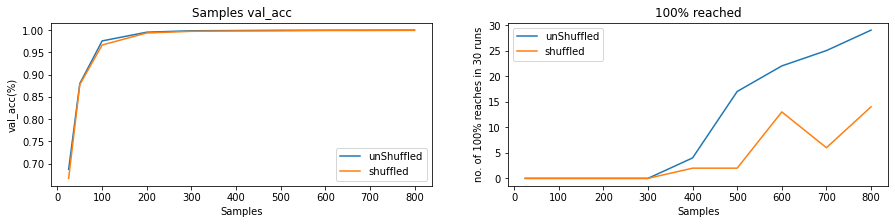

In [18]:
#Show experiences
logFNL1 = exppath + 'experiment_AS30-1.0.log'
logFNL2 = exppath + 'experiment_BS30-1.0.log'

plotCompareAcc(logFNL1, logFNL2, 'Samples')

Pts   100%     Acc    100%  Acc(shuffled)
2000   22     0.9998   15     0.9995
1800    8     0.9993    4     0.9986
1600    0     0.9985    2     0.9980
1400    0     0.9970    2     0.9972
1200    0     0.9964    0     0.9965
1000    0     0.9956    0     0.9949
 800    0     0.9936    0     0.9933
 600    0     0.9933    0     0.9930
 400    0     0.9905    0     0.9897
 200    0     0.9757    0     0.9756
 150    0     0.9675    0     0.9656
 100    0     0.9360    0     0.9325
  50    0     0.7493    0     0.7614
  25    0     0.4954    0     0.4788


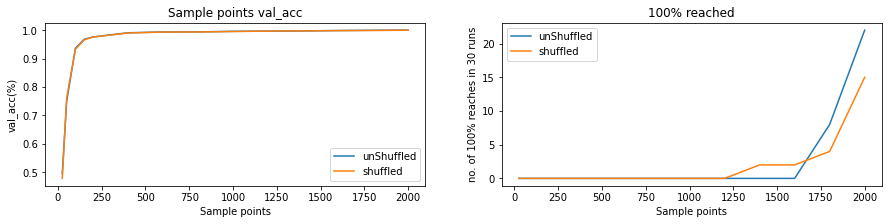

In [19]:
#Show experiences
logFNL1 = exppath + 'experiment_AP30-1.0.log'
logFNL2 = exppath + 'experiment_BP30-1.0.log'

plotCompareAcc(logFNL1, logFNL2, 'Sample points')

[0.9992857, 1.0, 0.99857146, 1.0, 0.9992857, 0.9992857, 0.9992857, 1.0, 1.0, 0.99857146, 1.0, 0.99857146, 1.0, 0.99857146, 0.9992857, 0.9992857, 1.0, 1.0, 1.0, 1.0, 0.9992857, 1.0, 1.0, 1.0, 0.9992857, 0.9992857, 0.9992857, 0.9992857, 1.0, 1.0]


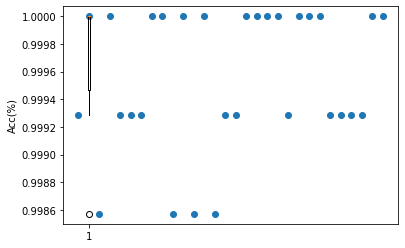

In [20]:
def boxplotCompareAcc(logFNL1, logFNL2, description): 
    logseries1 = getLogSeries(logFNL1, False) 
    logseries2 = getLogSeries(logFNL2, False) 

    series1 = logseries1[2000]['acc']
    series2 = logseries2[2000]['acc']

    #fig, ax1 = plt.subplots()
    #plt.title('Epochs to reach acc={}% or best'.format(earlyStopACCmin*100))
    
    print(series2)
    #plt.boxplot(boxes, positions=[20, 18, 16, 14, 12, 10, 8, 6, 4], widths=1)
    plt.boxplot(series1)#, positions=[2000])
    #ax2.set_ylabel('Acc(%)', color='red')
    plt.ylabel('Acc(%)')
    #ax1. .hold()
    #plt.show()

    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    #plt.boxplot(series2, positions=[5000])
    #plt.plot(np.ones(len(series2)), series2, 'x')#, positions=[2000])
    plt.scatter(range(len(series2)), series2)
    #ax2.plot(range(xlen), [x * 100 for x in trainAccs], 'red')
    #ax2.set_ylabel('Acc(%)', color='red')
    #ax2.tick_params(axis='y', labelcolor='red') #set axis tick mark labels to red
    plt.show()

    #exps, runs, means1, mins, maxs, stdevs, nbests1 = lstats(logseries1, measure='acc', best=1.0)
    #exps, runs, means2, mins, maxs, stdevs, nbests2 = lstats(logseries2, measure='acc', best=1.0)

    #print('Pts   100%     Acc    100%  Acc(shuffled)')
    #for e, m1, b1, m2, b2 in zip(exps, means1, nbests1, means2, nbests2):
    #    print('{:4d} {:4d} {:10.4f} {:4d} {:10.4f}'.format(e, b1, m1, b2, m2))

    #f = plt.figure(figsize=(15,3))
    #ax1 = f.add_subplot(121)
    #ax2 = f.add_subplot(122)
    #ax1.plot(exps, means1,  label='unShuffled')
    #ax1.plot(exps, means2,  label='shuffled')
    #ax2.plot(exps, nbests1, label='unShuffled')
    #ax2.plot(exps, nbests2, label='shuffled')
    '''
    ax1.set_title(description+' val_acc')
    ax1.set_xlabel(description)
    ax1.set_ylabel('val_acc(%)')
    ax1.legend(loc='best')
    ax2.set_title('100% reached')
    ax2.set_xlabel(description)
    ax2.set_ylabel('no. of 100% reaches in {} runs'.format(runs[0]))
    ax2.legend(loc='best')
    '''
    #fig.show()


#Show experiences
logFNL1 = exppath + 'experiment_AP30-1.0.log'
logFNL2 = exppath + 'experiment_BP30-1.0.log'

boxplotCompareAcc(logFNL1, logFNL2, 'Sample points')

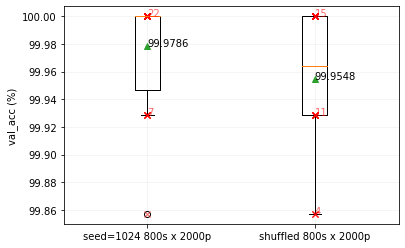

In [21]:
import numpy as np
import collections

def plotboxScatter(series, showmeans=True, showScatter=True,  disperse=True, showCount=False,
                   positionlabels='', title='', ylabel='', xlabel='', 
                   alphaScatter=0.6, formatScatter='rx', meanPrec='{:.4f}', grid=True):
    positions = range(1,len(series)+1)
    f, ax = plt.subplots()
    ax.boxplot(series, positions=positions, showmeans=showmeans)

    for i in range(len(positions)):
        if showScatter:
            if disperse:
                x = np.linspace(positions[i]-0.1, positions[i]+0.1, len(series[i]))
            else:
                x = np.ones(len(series[i]))
                x = [e*positions[i] for e in x]
                if showCount:
                    counter=collections.Counter(series[i])
                    for c in counter:
                        if counter[c] > 1:
                            ax.annotate(str(counter[c]), (positions[i], c), color='red', alpha=alphaScatter)
            ax.plot(x, series[i], formatScatter, alpha=alphaScatter)
        mean = np.mean(series[i])
        ax.annotate(meanPrec.format(mean), (positions[i], mean))

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticklabels(positionlabels)
    if grid: ax.grid(color='k', alpha=0.05)
    else:    ax.grid()
    return f

logFNL1 = exppath + 'experiment_AP30-1.0.log'
logFNL2 = exppath + 'experiment_BP30-1.0.log'
logseries = getLogSeries(logFNL1, False) 
data1 = logseries[2000]['acc']
data1 = [e*100 for e in data1]
logseries = getLogSeries(logFNL2, False) 
data2 = logseries[2000]['acc'] 
data2 = [e*100 for e in data2]

f = plotboxScatter([data1, data2], disperse=False, showCount=True, 
                   positionlabels=['seed=1024 800s x 2000p', 'shuffled 800s x 2000p'], ylabel = 'val_acc (%)')
f.show()

In [22]:
##Fix log info
'''
import os

def addtime(log, idx):
#def delmem(log, idx):
    entry = list(log._SimpleLog__log[idx])
    info = list(entry[1])
    #info = info[:-1]
    info = (*info, 0)
    print(info)
    entry[1] = tuple(info)
    log._SimpleLog__log[idx] = tuple(entry)

files = os.listdir(exppath)
addTime= []
remMem = []
print (len(files), files)
for f in files: 
    log = SimpleLog.load(exppath+f)
    last = log.getLast()[1]
    if len(last)==5: addTime.append(f)
    if len(last)==7: remMem.append(f)
    print(len(last), f)

print('->', remMem)
print('->', addTime)

for f in addTime: #remMem:
    l = SimpleLog.load(exppath + f)
    #showLog(l, time=False)
    for i in range(l.len()):
        addTime(l, i)
        #delmem(l, i)
    #l.save(exppath + f)
    showLog(l, time=False)
'''

"\nimport os\n\ndef addtime(log, idx):\n#def delmem(log, idx):\n    entry = list(log._SimpleLog__log[idx])\n    info = list(entry[1])\n    #info = info[:-1]\n    info = (*info, 0)\n    print(info)\n    entry[1] = tuple(info)\n    log._SimpleLog__log[idx] = tuple(entry)\n\nfiles = os.listdir(exppath)\naddTime= []\nremMem = []\nprint (len(files), files)\nfor f in files: \n    log = SimpleLog.load(exppath+f)\n    last = log.getLast()[1]\n    if len(last)==5: addTime.append(f)\n    if len(last)==7: remMem.append(f)\n    print(len(last), f)\n\nprint('->', remMem)\nprint('->', addTime)\n\nfor f in addTime: #remMem:\n    l = SimpleLog.load(exppath + f)\n    #showLog(l, time=False)\n    for i in range(l.len()):\n        addTime(l, i)\n        #delmem(l, i)\n    #l.save(exppath + f)\n    showLog(l, time=False)\n"

In [23]:
#Manually Re assemble broken log if needed
#Must be done case by case
#
'''
def getRun(log, entry):
    return log._SimpleLog__log[entry][1][1]

def setRun(log, idx, val):
    entry = list(log._SimpleLog__log[idx])
    info = list(entry[1])
    info[1] = val
    entry[1] = tuple(info)
    log._SimpleLog__log[idx] = tuple(entry)

#setRun(log0, 0, -2)
#print(getRun(log0, 0))

logFN0 = exppath + 'experiment0.log'
logFN1 = exppath + 'experiment1.log'
logFN2 = exppath + 'experiment2.log'
logFNS = exppath + 'experimentX.log'

log0   = SimpleLog.load(logFN0)
log1   = SimpleLog.load(logFN1)
log2   = SimpleLog.load(logFN2)

#log3   = log3.head(25)
#for i in range(log4.len()): setRun(log4, i, i+17)

log0.append(log1)
log0.append(log2)
log0.append(log3)
log0.save(logFNS)

#Reload and check
log = SimpleLog.load(logFNS)

print('Log entries = ', len(log.getInfo()))
print('Log: ')
for i in log.getInfo(): print(i)

print('\nLog last entrie:')
print(log.getLast()[0])
print(log.getLast()[1])
'''

"\ndef getRun(log, entry):\n    return log._SimpleLog__log[entry][1][1]\n\ndef setRun(log, idx, val):\n    entry = list(log._SimpleLog__log[idx])\n    info = list(entry[1])\n    info[1] = val\n    entry[1] = tuple(info)\n    log._SimpleLog__log[idx] = tuple(entry)\n\n#setRun(log0, 0, -2)\n#print(getRun(log0, 0))\n\nlogFN0 = exppath + 'experiment0.log'\nlogFN1 = exppath + 'experiment1.log'\nlogFN2 = exppath + 'experiment2.log'\nlogFNS = exppath + 'experimentX.log'\n\nlog0   = SimpleLog.load(logFN0)\nlog1   = SimpleLog.load(logFN1)\nlog2   = SimpleLog.load(logFN2)\n\n#log3   = log3.head(25)\n#for i in range(log4.len()): setRun(log4, i, i+17)\n\nlog0.append(log1)\nlog0.append(log2)\nlog0.append(log3)\nlog0.save(logFNS)\n\n#Reload and check\nlog = SimpleLog.load(logFNS)\n\nprint('Log entries = ', len(log.getInfo()))\nprint('Log: ')\nfor i in log.getInfo(): print(i)\n\nprint('\nLog last entrie:')\nprint(log.getLast()[0])\nprint(log.getLast()[1])\n"